# Breast Cancer Classification (NumPy Logistic Regression)
Train a custom NumPy-only logistic regression on the Breast Cancer Wisconsin dataset. The notebook shows preprocessing, scaling, training, loss visualization, and feature importance.


In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from src.model import LogisticRegression, StandardScaler

In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)

print(f"Features: {X.shape[1]} | Samples: {X.shape[0]}")
print(f"Classes: {data.target_names.tolist()}")


Features: 30 | Samples: 569
Classes: ['malignant', 'benign']


In [3]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
# Scale features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Initialize model
model = LogisticRegression(
    n_features=X_train.shape[1],
    lr=0.05,
    reg_lambda=0.001,
)


In [6]:
# Training loop
epochs = 400
losses = []

for epoch in range(epochs):
    _, y_hat = model.forward(X_train)
    loss = model.loss(y_train, y_hat)
    dW, dB = model.backward(X_train, y_train, y_hat)
    model.update(dW, dB)
    losses.append(loss)
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss:.4f}")


Epoch 000 | Loss: 1.4248
Epoch 050 | Loss: 0.3611
Epoch 100 | Loss: 0.2527
Epoch 150 | Loss: 0.2137
Epoch 200 | Loss: 0.1907
Epoch 250 | Loss: 0.1738
Epoch 300 | Loss: 0.1604
Epoch 350 | Loss: 0.1492


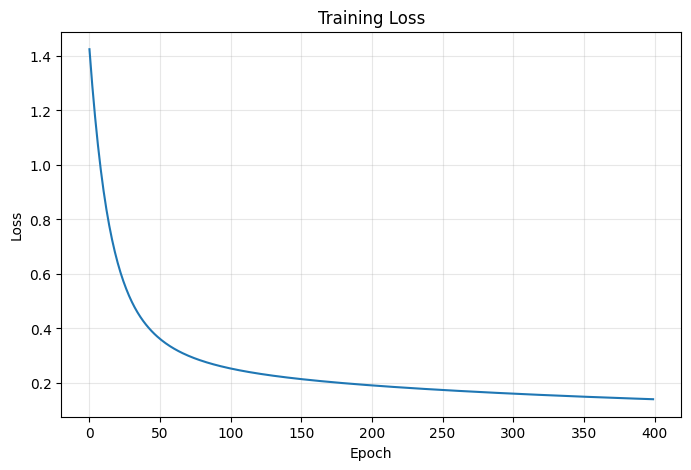

In [7]:
# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(alpha=0.3)
plt.show()


In [8]:
# Evaluate accuracy
_, train_probs = model.forward(X_train)
_, test_probs = model.forward(X_test)

train_acc = model.accuracy(y_train, train_probs)
test_acc = model.accuracy(y_test, test_probs)

print(f"Train accuracy: {train_acc:.3f} Test accuracy:  {test_acc:.3f}")


Train accuracy: 0.945 Test accuracy:  0.921


In [9]:
# Feature importance (weights)
weights = model.weights.flatten()
feature_names = data.feature_names

sorted_idx = np.argsort(weights)

print("Top positive signals:")
for idx in sorted_idx[-5:][::-1]:
    print(f"  {feature_names[idx]}: {weights[idx]:.4f}")

print("Top negative signals:")
for idx in sorted_idx[:5]:
    print(f"  {feature_names[idx]}: {weights[idx]:.4f}")


Top positive signals:
  mean concavity: 1.9878
  fractal dimension error: 1.2586
  compactness error: 1.1089
  concave points error: 0.9431
  worst smoothness: 0.6910
Top negative signals:
  area error: -2.5505
  mean compactness: -2.3841
  worst concavity: -1.8064
  mean radius: -1.5429
  mean perimeter: -1.3007
